import the all modules

In [278]:
import numpy as np
from scipy.signal import correlate
import matplotlib.pyplot as plt
import numpy as np
import scipy.signal
import matplotlib.pyplot as plt

Loading the input and output signal

In [279]:
# Step 1: Read input signal x(t) and output signal y(t) from text files
x = np.loadtxt('INPUT-SIGNAL-X(t).txt')
y = np.loadtxt('OUTPUT-SIGNAL-Y(t).txt')

All about input

In [280]:
print(x)

[-0.01 -0.01 -0.   ... -0.11 -0.04  0.03]


In [281]:
print(x.size)
print(x.max())
print(x.min())

199067
2.46
-2.91


In [282]:
print(y)

[ 0.   -0.   -0.   ...  0.02  0.01  0.01]


In [283]:
y.size

199067

Input Signal

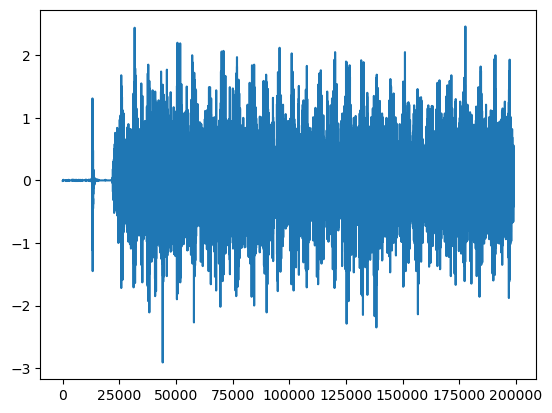

In [284]:
plt.plot(x)
plt.show()

OutPut signal

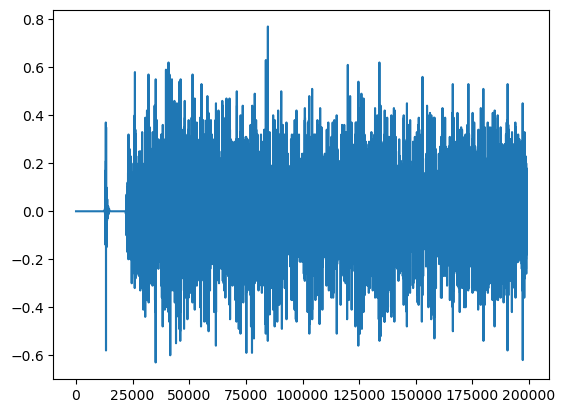

In [285]:
plt.plot(y)
plt.show()

implement three types of filters

In [286]:
def low_pass_filter(signal, cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    norm_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = scipy.signal.cheby1(4,5, norm_cutoff_freq, btype='low')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to implement high-pass filter
def high_pass_filter(signal, cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    norm_cutoff_freq = cutoff_freq / nyquist_freq
    b, a = scipy.signal.cheby1(4,5, norm_cutoff_freq, btype='high')

    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal

# Function to implement band-pass filter
def band_pass_filter(signal, low_cutoff_freq, high_cutoff_freq, sampling_freq):
    nyquist_freq = 0.5 * sampling_freq
    norm_low_cutoff_freq = low_cutoff_freq / nyquist_freq
    norm_high_cutoff_freq = high_cutoff_freq / nyquist_freq
    b, a = scipy.signal.cheby1(4,5, [norm_low_cutoff_freq, norm_high_cutoff_freq], btype='band')
    filtered_signal = scipy.signal.lfilter(b, a, signal)
    return filtered_signal


Function to calculate correlation between two signals

In [287]:
def calculate_correlation(signal1, signal2):
    correlation = np.correlate(signal1, signal2, mode='same')
    return correlation

In [288]:
def calculate_correlation_coefficient(signal1, signal2):
    correlation_coefficient = np.corrcoef(signal1, signal2)[0, 1]
    return correlation_coefficient

Parameter

In [289]:
cutoff_freq = 1000  # cutoff frequency in Hz
sampling_freq = 5000  # sampling frequency in Hz
low_cutoff_freq = 200  # low cutoff frequency in Hz
high_cutoff_freq = 800  #  high cutoff frequency in Hz

Filter output signal

In [290]:
# Filter input signal using low-pass filter
filtered_low_pass = low_pass_filter(x, cutoff_freq, sampling_freq)
# Filter input signal using high-pass filter
filtered_high_pass = high_pass_filter(x, cutoff_freq, sampling_freq)
# Filter input signal using band-pass filter
filtered_band_pass = band_pass_filter(x, low_cutoff_freq, high_cutoff_freq, sampling_freq)


Calculate correlation between filtered signals and output signal

In [291]:
correlation_low_pass = calculate_correlation(filtered_low_pass, y)
correlation_high_pass = calculate_correlation(filtered_high_pass, y)
correlation_band_pass = calculate_correlation(filtered_band_pass, y)


Calculate correlation between filtered signals and output signal

In [292]:
correlation_coe_low_pass = calculate_correlation_coefficient(filtered_low_pass, y)
correlation_coe_high_pass = calculate_correlation_coefficient(filtered_high_pass, y)
correlation_coe_band_pass = calculate_correlation_coefficient(filtered_band_pass, y)


In [293]:
best_filter

0

In [294]:
best_filter = np.argmax([correlation_low_pass.max(), correlation_high_pass.max(), correlation_band_pass.max()])

# Print the result
if best_filter == 0:
    print("The best match is the Low Pass Filter.")
elif best_filter == 1:
    print("The best match is the High Pass Filter.")
else:
    print("The best match is the Band Pass Filter.")

The best match is the Low Pass Filter.


In [295]:
print(correlation_coe_low_pass)
print(correlation_coe_high_pass)
print(correlation_coe_band_pass)

-0.19560936929808245
-0.0007325297089246183
0.0005553965366418046


plot of the Input and Output Signals

In [296]:
def plot_signals(x, y, title):
    plt.figure(figsize=(10, 5))
    plt.plot(x, label='Input Signal')
    plt.plot(y, label='Output Signal')
    plt.title(title)
    plt.xlabel('Time')
    plt.ylabel('Amplitude')
    plt.legend()
    plt.grid(True)
    plt.show()
def read_signal(file_path):
    with open(file_path, 'r') as file:
        signal = [float(line.strip()) for line in file]
    return np.array(signal)


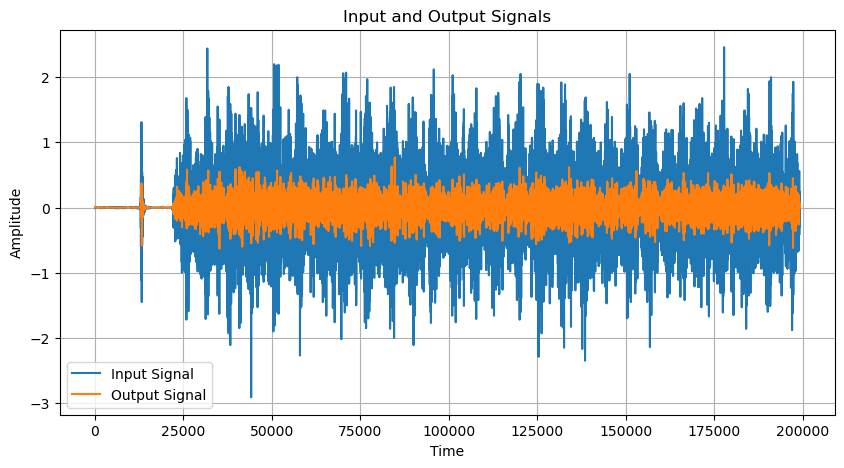

In [297]:
# Plot input and output signals
plot_signals(x, y, title='Input and Output Signals')

plot of the low pass filter output and Output Signals

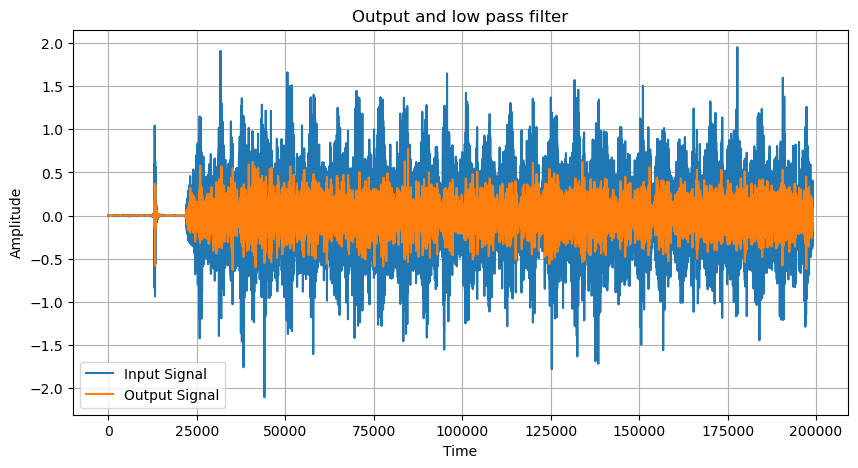

In [298]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_low_pass, label='Input Signal')
plt.plot(y, label='Output Signal')
plt.title("Output and low pass filter")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plot of the high pass filter output and Output Signals

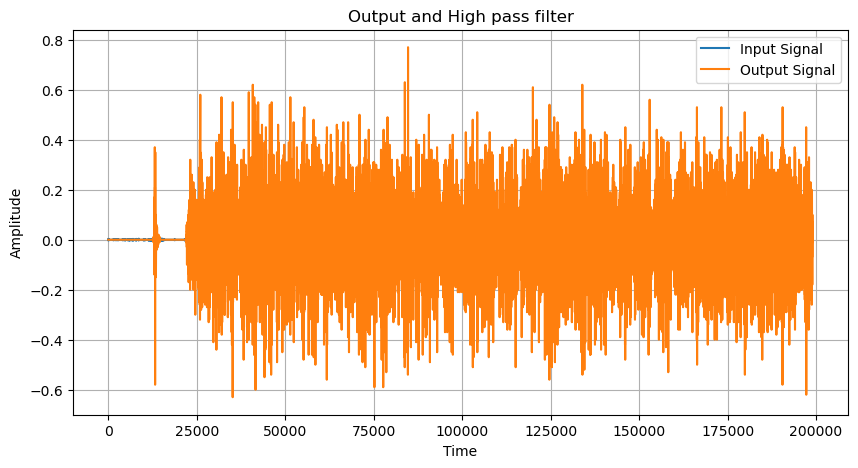

In [299]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_high_pass, label='Input Signal')
plt.plot(y, label='Output Signal')
plt.title("Output and High pass filter")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()

plot of the band pass filter output and Output Signals

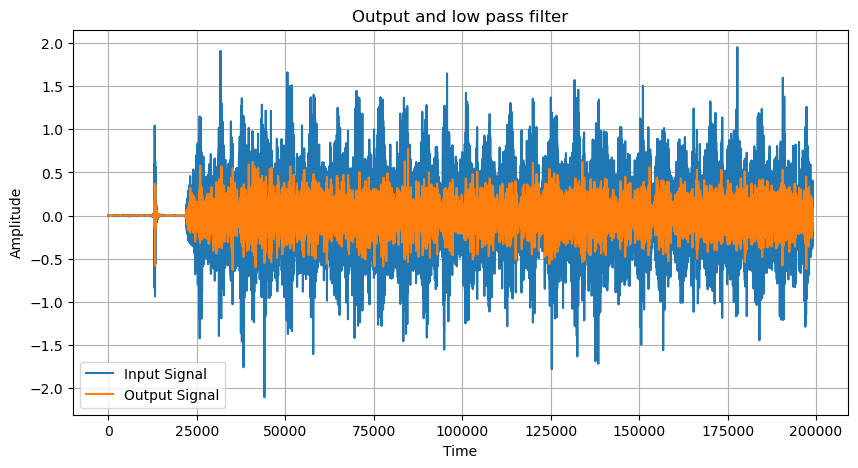

In [300]:
plt.figure(figsize=(10, 5))
plt.plot(filtered_low_pass, label='Input Signal')
plt.plot(y, label='Output Signal')
plt.title("Output and low pass filter")
plt.xlabel('Time')
plt.ylabel('Amplitude')
plt.legend()
plt.grid(True)
plt.show()